In [2]:
!nvidia-smi

Fri Dec  1 16:18:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install PyYAML

In [4]:
#https://detectron2.readthedocs.io/en/latest/tutorials/install.html
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-2mvs7chz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-2mvs7chz
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5de5319a49e7ea819586d3d6a817632392dfdeb2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6118768 sha256=811f600432664774092833acec737

In [7]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [8]:
!unzip '/content/drive/My Drive/ds_wider/wider_face_split.zip'
!unzip '/content/drive/My Drive/ds_wider/WIDER_train.zip'
!unzip '/content/drive/My Drive/ds_wider/WIDER_val.zip'

Streaming output truncated to the last 5000 lines.
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_469.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_473.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_474.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_476.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_478.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg  
  inflating: WIDER_train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sport

In [9]:
#Pandas library: https://pandas.pydata.org/docs/
import pandas as pd
#read the data from files
trainloc= '/content/wider_face_split/wider_face_train_bbx_gt.txt'
valloc= '/content/wider_face_split/wider_face_val_bbx_gt.txt'
train= pd.read_csv(trainloc,header=None)
val= pd.read_csv(valloc,header=None)

In [10]:
#function to reformat data with only .jpg images files and number of faces in images as well as box matrices that are drawn around human faces.
def reformat(data):
  vals = data[0].values
  names=[]
  no_faces=[]
  bbox=[]
  for i in range(len(vals)):
      if ".jpg" in vals[i]:
        names.append(vals[i])
        no_faces.append(int(vals[i+1]))
        tempbox=[]
        for j in range(i+2,i+2+int(vals[i+1])):
          tempbox.append(vals[j])
        bbox.append(tempbox)
  return pd.DataFrame({'name':names,'bbox':bbox,'num_faces':no_faces})

In [11]:
# reformat data for training data and validatation data
train= reformat(train)
val= reformat(val)

In [12]:
#Check the first 10 rows
train.head(10)

,name,bbox,num_faces
0,0--Parade/0_Parade_marchingband_1_849.jpg,[449 330 122 149 0 0 0 0 0 0 ],1
1,0--Parade/0_Parade_Parade_0_904.jpg,[361 98 263 339 0 0 0 0 0 0 ],1
2,0--Parade/0_Parade_marchingband_1_799.jpg,"[78 221 7 8 2 0 0 0 0 0 , 78 238 14 17 2 0 0 0...",21
3,0--Parade/0_Parade_marchingband_1_117.jpg,"[69 359 50 36 1 0 0 0 0 1 , 227 382 56 43 1 0 ...",9
4,0--Parade/0_Parade_marchingband_1_778.jpg,"[27 226 33 36 1 0 0 0 2 0 , 63 95 16 19 2 0 0 ...",35
5,0--Parade/0_Parade_Parade_0_343.jpg,"[134 580 12 14 2 0 0 0 1 0 , 55 581 5 10 2 0 1...",18
6,0--Parade/0_Parade_marchingband_1_205.jpg,"[60 56 19 19 2 0 1 0 1 0 , 39 2 17 21 2 0 1 0 ...",65
7,0--Parade/0_Parade_Parade_0_106.jpg,"[9 260 18 23 1 0 0 0 0 0 , 61 248 24 29 0 0 0 ...",40
8,0--Parade/0_Parade_Parade_0_476.jpg,"[566 158 22 17 2 0 0 0 2 0 , 663 118 24 28 2 0...",35
9,0--Parade/0_Parade_marchingband_1_12.jpg,"[575 158 48 57 1 0 0 0 0 0 , 355 154 48 61 1 0...",18


In [13]:
#Check the shapes
print(train.shape)
print(val.shape)

(12880, 3)
(3226, 3)


In [14]:
#Add additional path before old path for classifying between training and validating images
train['name']= train['name'].apply(lambda x: 'WIDER_train/images/'+x )
val['name']= val['name'].apply(lambda x: 'WIDER_val/images/'+x )

In [15]:
#The bbox values are integer, we have to change it to real number (float)
#Credits to CHAT GPT for helping me write simple and efficient these 2 lines of code
import numpy as np
train['bbox']= train['bbox'].apply(lambda row:[ np.float_(annos.split()) for annos in row] )
val['bbox']= val['bbox'].apply(lambda row:[ np.float_(annos.split()) for annos in row] )
# first 5 rows
train.head(5)

,name,bbox,num_faces
0,WIDER_train/images/0--Parade/0_Parade_marching...,"[[449.0, 330.0, 122.0, 149.0, 0.0, 0.0, 0.0, 0...",1
1,WIDER_train/images/0--Parade/0_Parade_Parade_0...,"[[361.0, 98.0, 263.0, 339.0, 0.0, 0.0, 0.0, 0....",1
2,WIDER_train/images/0--Parade/0_Parade_marching...,"[[78.0, 221.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0...",21
3,WIDER_train/images/0--Parade/0_Parade_marching...,"[[69.0, 359.0, 50.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",9
4,WIDER_train/images/0--Parade/0_Parade_marching...,"[[27.0, 226.0, 33.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",35


In [16]:
#taking the class and add it to the current data
#Credits to CHAT GPT for helping me write simple and efficient string format processing lines of code
train['class']= train['name'].apply(lambda x:x.split("/")[2].split("--")[1])
val['class']= val['name'].apply(lambda x:x.split("/")[2].split("--")[1])
# first 5 rows
train.head(5)

,name,bbox,num_faces,class
0,WIDER_train/images/0--Parade/0_Parade_marching...,"[[449.0, 330.0, 122.0, 149.0, 0.0, 0.0, 0.0, 0...",1,Parade
1,WIDER_train/images/0--Parade/0_Parade_Parade_0...,"[[361.0, 98.0, 263.0, 339.0, 0.0, 0.0, 0.0, 0....",1,Parade
2,WIDER_train/images/0--Parade/0_Parade_marching...,"[[78.0, 221.0, 7.0, 8.0, 2.0, 0.0, 0.0, 0.0, 0...",21,Parade
3,WIDER_train/images/0--Parade/0_Parade_marching...,"[[69.0, 359.0, 50.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",9,Parade
4,WIDER_train/images/0--Parade/0_Parade_marching...,"[[27.0, 226.0, 33.0, 36.0, 1.0, 0.0, 0.0, 0.0,...",35,Parade


In [17]:
# reading class names from file
classes_data= pd.read_csv('drive/My Drive/ds_wider/easy.txt',header=None)
classes_labels= classes_data[0].values
print(classes_labels)

['Gymnastics' 'Handshaking' 'Waiter Waitress' 'Press Conference'
 'Worker Laborer' 'Parachutist Paratrooper' 'Sports Coach Trainer'
 'Meeting' 'Aerobics' 'Row Boat' 'Dancing' 'Swimming' 'Family Group'
 'Balloonist' 'Dresses' 'Couple' 'Jockey' 'Tennis' 'Spa' 'Surgeons']


In [18]:
# create new data for training and validating
train_df= pd.DataFrame()
val_df= pd.DataFrame()
# taking rows with classes
for label in classes_labels:
  train_df= pd.concat( [train_df, train[train['class']==label]] )
  val_df= pd.concat( [val_df, val[val['class']==label]] )

In [19]:
#format of new data
values = train_df.values[0]
print(values)

['WIDER_train/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_785.jpg'
 list([array([480., 212., 102., 120.,   0.,   0.,   0.,   0.,   0.,   0.])])
 1 'Gymnastics']


In [20]:
#function to create annotation
#OpenCV: https://opencv.org
#Detectron2: https://github.com/facebookresearch/detectron2/tree/main
import cv2
from detectron2.structures import BoxMode

def create_annotation(data):

  ds_list= []
  for idx, value in enumerate(data.values):
    img_record= {}
    filename= value[0]
    height, width= cv2.imread(filename).shape[:2]
    img_record["height"]= height
    img_record["width"]= width
    img_record["image_id"]= idx
    img_record["file_name"]= filename
    box_obj = []
    for i in range(len(value[1])):
      antts=value[1][i]
      x1=antts[0]
      y1=antts[1]
      w=antts[2]
      h=antts[3]
      x2=x1+w
      y2=y1+h
      obj = {"bbox": [x1, y1, x2, y2],"bbox_mode": BoxMode.XYXY_ABS,"category_id": 0,"iscrowd": 0}
      box_obj.append(obj)
    img_record["annotations"] = box_obj
    ds_list.append(img_record)

  return ds_list


In [21]:
#create annotations for training and validation sets
train_annotation = create_annotation(train_df)
val_annotation = create_annotation(val_df)

In [22]:
#check the format of annotation
print(train_annotation[0])

{'height': 683, 'width': 1024, 'image_id': 0, 'file_name': 'WIDER_train/images/40--Gymnastics/40_Gymnastics_Gymnastics_40_785.jpg', 'annotations': [{'bbox': [480.0, 212.0, 582.0, 332.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}]}


In [23]:
#From this I learned how to train and import models from
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)

from detectron2.data import DatasetCatalog, MetadataCatalog
#register training dataset
DatasetCatalog.register("face_train", lambda d="train": create_annotation(train_df))

In [24]:
#register metadata
MetadataCatalog.get("face_train").set(thing_classes=["face"])

namespace(name='face_train', thing_classes=['face'])

In [25]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
#print classes' name
face_metadata = MetadataCatalog.get("face_train")
print(face_metadata)

Metadata(name='face_train', thing_classes=['face'])


In [26]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_1x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_1x.yaml")

In [27]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
#set up the configures for the training and validating
#In this one, I tried to play around with the parameters.
cfg.DATASETS.TRAIN = ("face_train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.SOLVER.MAX_ITER = 1000
cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 500
cfg.SOLVER.GAMMA = 0.05

In [28]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
#save the weights
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#Default trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
#train the model
trainer.train()

[12/01 16:39:16 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_bfca0b.pkl: 152MB [00:01, 108MB/s]                           
  pixel_mean
  pixel_std


[12/01 16:39:45 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/01 16:40:14 d2.utils.events]:  eta: 0:19:36  iter: 19  total_loss: 2.401  loss_cls: 1.397  loss_box_reg: 0.9063    time: 1.2525  last_time: 1.2589  data_time: 0.0970  last_data_time: 0.0901   lr: 3.8962e-05  max_mem: 6911M
[12/01 16:40:40 d2.utils.events]:  eta: 0:18:46  iter: 39  total_loss: 1.543  loss_cls: 0.8691  loss_box_reg: 0.7257    time: 1.1886  last_time: 1.0693  data_time: 0.0569  last_data_time: 0.0253   lr: 7.8922e-05  max_mem: 6911M
[12/01 16:41:04 d2.utils.events]:  eta: 0:18:19  iter: 59  total_loss: 0.7976  loss_cls: 0.4113  loss_box_reg: 0.3777    time: 1.1882  last_time: 1.1705  data_time: 0.0561  last_data_time: 0.0743   lr: 0.00011888  max_mem: 6911M
[12/01 16:41:30 d2.utils.events]:  eta: 0:18:29  iter: 79  total_loss: 0.9417  loss_cls: 0.4637  loss_box_reg: 0.4446    time: 1.2145  last_time: 1.2335  data_time: 0.0747  last_data_time: 0.0096   lr: 0.00015884  max_mem: 6911M
[12/01 16:41:54 d2.utils.events]:  eta: 0:18:07  iter: 99  total_loss: 0.743  loss_cls:

In [29]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
#register validation dataset
DatasetCatalog.register("face_val", lambda d="val": create_annotation(val_df))
#register metadata
MetadataCatalog.get("face_val").set(thing_classes=["face"])

namespace(name='face_val', thing_classes=['face'])

In [30]:
#https://detectron2.readthedocs.io/en/latest/tutorials/getting_started.html
#https://www.youtube.com/watch?v=eUSgtfK4ivk (Meta Open Source channel)
#load the final weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.8
cfg.DATASETS.TEST = ("face_val", )

In [31]:
from detectron2.engine import DefaultPredictor
#Predictor for images
predictor = DefaultPredictor(cfg)

[12/01 17:00:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


Input image's pathfrs.jpg
{'instances': Instances(num_instances=4, image_height=1414, image_width=2119, fields=[pred_boxes: Boxes(tensor([[ 388.9421,  162.9911,  656.3180,  528.2168],
        [ 929.1149,   43.0624, 1262.7649,  480.7890],
        [ 859.6458,  471.4629, 1099.9049,  801.8433],
        [1316.8810,   36.4690, 1640.1453,  444.7964]], device='cuda:0')), scores: tensor([0.9511, 0.9302, 0.9247, 0.9200], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


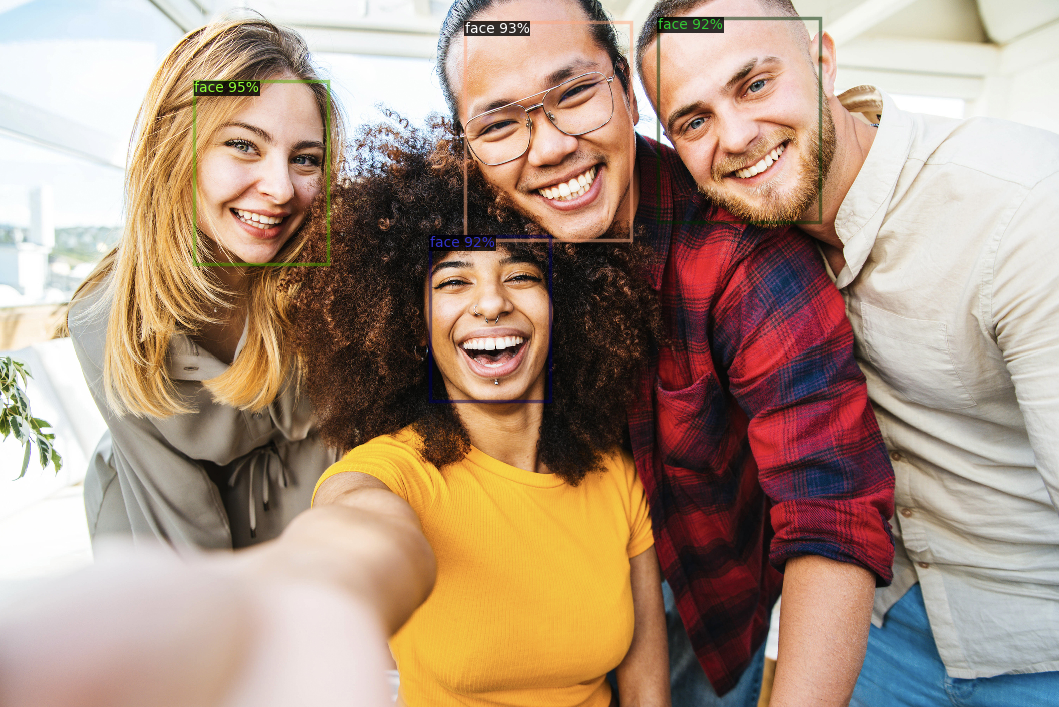

In [119]:
file_name=input("Input image's path")
im = cv2.imread(file_name)
outputs = predictor(im)
print(outputs)
v = Visualizer(im[:, :, ::-1], metadata=face_metadata, scale=0.5)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [93]:
#https://github.com/facebookresearch/detectron2/issues/603
from detectron2.structures import Boxes
tests=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(tests)

[[1016.8997   748.3949  1275.6575  1135.3854 ]
 [ 682.30676  924.9565   976.5369  1297.0475 ]
 [1172.1891   116.53403 1428.2589   451.2437 ]
 [1310.3918   853.0045  1584.881   1156.4816 ]]


In [89]:
#FULL CREDITS: https://github.com/theAIGuysCode/colab-webcam/blob/main/colab_webcam.ipynb
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


In [88]:
#FULL CREDITS: https://github.com/theAIGuysCode/colab-webcam/blob/main/colab_webcam.ipynb
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [118]:
#CREDIT: https://github.com/theAIGuysCode/colab-webcam/blob/main/colab_webcam.ipynb
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
from IPython.display import Image
import io
import html
import time

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # get face bounding box for overlay
    outputs = predictor(img)

    for (x,y,w,h) in outputs['instances'].pred_boxes.tensor.cpu().numpy():
      #Window size in google colab is different, therefore I have to change the parameter corresponding to the scale
      x,y,w,h=int(x)-10,int(y)-10,int(w)-240,int(h)-140
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>